In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.3 MB/s eta 0:00:00


In [ ]:
# !pip install transformers

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

imdb = load_dataset('/content/drive/My Drive/Colab/Uni/HS23/EITASP/', data_files={'train': 'train.csv', 'test': 'test.csv', 'validation': 'validation.csv'})
# tokenized_imdb = imdb.map(preprocess_function, batched=True)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
imdb['train'][0]

{'Unnamed: 0': 2347,
 '_id': '61e0642e1875bb0021077478',
 'review': 'Alles irreführend mit diesem Kurs: Prüfungsrelevante Inhalte, Prüfungsfragen, Aufsicht oder keine Aufsicht, Dias und vieles mehr!',
 'score': 1,
 'upvotes': 0.0,
 'downvotes': 0.0,
 'sum': 0}

In [ ]:
imdb = imdb.rename_column("review", "text")
imdb = imdb.rename_column("sum", "labels")

In [ ]:
imdb = imdb.remove_columns(["Unnamed: 0", "_id", "score", "upvotes", "downvotes"])

In [ ]:
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 7656
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 1423
    })
    validation: Dataset({
        features: ['text', 'labels'],
        num_rows: 403
    })
})

In [ ]:
!pip install seaborn
!pip install matplotlib

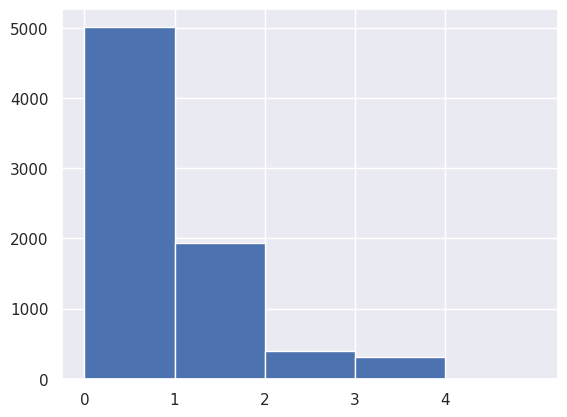

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.rcParams['font.size'] = 10
plt.hist(imdb["train"]["labels"], bins=[0, 1, 2, 3, 4, 5]);
plt.xticks(range(0, 5))

plt.show()

In [ ]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-german-cased", padding=True, trunctuation=True)

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_imdb = imdb.map(preprocess_function, batched=True)

Map:   0%|          | 0/7656 [00:00<?, ? examples/s]

Map:   0%|          | 0/1423 [00:00<?, ? examples/s]

Map:   0%|          | 0/403 [00:00<?, ? examples/s]

In [ ]:
input_ids = tokenized_imdb['train']['input_ids']
attention_mask = tokenized_imdb['train']['attention_mask']
labels = tokenized_imdb['train']['labels']

In [ ]:
X = np.column_stack((input_ids, attention_mask))  # Stack them horizontally
y = np.array(labels)
X[0]

/usr/local/lib/python3.10/dist-packages/numpy/lib/shape_base.py:652: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(v)


array([list([102, 4246, 20020, 5658, 30888, 212, 893, 6490, 853, 17639, 8311, 12033, 3882, 11154, 818, 17639, 4789, 818, 15641, 394, 855, 15641, 818, 14903, 30886, 136, 13200, 484, 3330, 103]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
      dtype=object)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy={0: 1500, 1: 1300})
X_res, y_res = rus.fit_resample(X, y)
X_res[0]

array([list([102, 10871, 222, 9298, 13127, 30886, 566, 5708, 23151, 30887, 670, 843, 7384, 136, 21242, 566, 5473, 13786, 214, 853, 2303, 334, 4420, 271, 1061, 871, 5791, 818, 484, 13889, 4897, 566, 103]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
      dtype=object)

In [ ]:
input_ids_resampled = X_res[:, :len(input_ids[0])]
attention_mask_resampled = X_res[:, :len(input_ids[0])]
attention_mask_resampled[0]

array([list([102, 10871, 222, 9298, 13127, 30886, 566, 5708, 23151, 30887, 670, 843, 7384, 136, 21242, 566, 5473, 13786, 214, 853, 2303, 334, 4420, 271, 1061, 871, 5791, 818, 484, 13889, 4897, 566, 103]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
      dtype=object)

In [ ]:
# De-nest the resampled lists
input_ids_resampled = [list(arr[0]) for arr in input_ids_resampled]
attention_mask_resampled = [list(arr[0]) for arr in attention_mask_resampled]


In [ ]:
from datasets import Dataset

dataset_resampled = Dataset.from_dict({
    'input_ids': input_ids_resampled,
    'attention_mask': attention_mask_resampled,
    'labels': y_res,
    'text': ['' for _ in range(len(y_res))]
})


In [ ]:
input_ids_resampled_list = [list(arr) for arr in input_ids_resampled]
attention_mask_resampled_list = [list(arr) for arr in attention_mask_resampled]
print(type(input_ids_resampled_list), type(input_ids_resampled_list[0]))  # should both be <class 'list'>
print(len(input_ids_resampled_list), len(input_ids_resampled_list[0]))  # should match your dataset's dimensions



<class 'list'> <class 'list'>
3506 33


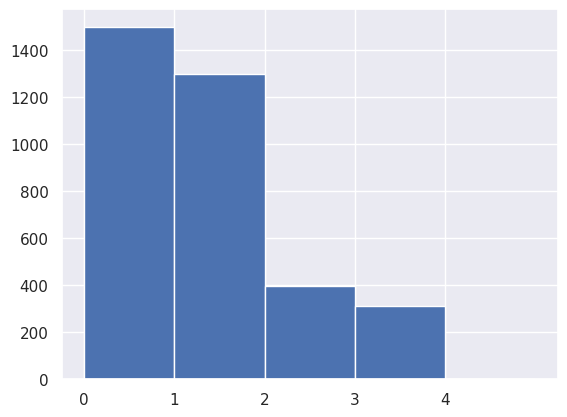

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.rcParams['font.size'] = 10
plt.hist(dataset_resampled["labels"], bins=[0, 1, 2, 3, 4, 5]);
plt.xticks(range(0, 5))

plt.show()

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(dataset_resampled["labels"]), y=imdb["train"]["labels"])
class_wts

array([0.38165503, 0.98914729, 4.82115869, 6.19417476])

In [ ]:
from transformers import DistilBertForSequenceClassification, TrainingArguments, Trainer

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-german-cased", num_labels=4
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-german-cased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Check if GPU is available
if torch.cuda.is_available():
    print("using GPU")
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

using GPU


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
torch.tensor(weights)

# loss function
# cross_entropy  = nn.NLLLoss(weight=weights)

<ipython-input-35-8cd0c08c443f>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(weights)


tensor([0.3817, 0.9891, 4.8212, 6.1942], device='cuda:0')

In [ ]:
from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(weights, device=model.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [ ]:
dataset_resampled["input_ids"]

[[102,
  10871,
  222,
  9298,
  13127,
  30886,
  566,
  5708,
  23151,
  30887,
  670,
  843,
  7384,
  136,
  21242,
  566,
  5473,
  13786,
  214,
  853,
  2303,
  334,
  4420,
  271,
  1061,
  871,
  5791,
  818,
  484,
  13889,
  4897,
  566,
  103],
 [102,
  1685,
  12958,
  818,
  684,
  545,
  13018,
  13306,
  195,
  403,
  17570,
  13277,
  308,
  566,
  965,
  11056,
  24606,
  818,
  2276,
  1058,
  143,
  5624,
  394,
  261,
  3495,
  17885,
  450,
  818,
  3669,
  255,
  20663,
  566,
  1124,
  24902,
  566,
  566,
  566,
  197,
  20395,
  30881,
  4315,
  3988,
  818,
  1710,
  21165,
  2209,
  566,
  103],
 [102, 7198, 17352, 16644, 818, 494, 21242, 853, 2530, 103],
 [102,
  179,
  30927,
  843,
  9530,
  818,
  995,
  272,
  10147,
  7510,
  935,
  994,
  566,
  20527,
  2602,
  2495,
  818,
  6231,
  947,
  1615,
  270,
  1247,
  22394,
  17087,
  105,
  9617,
  2495,
  566,
  229,
  21547,
  16684,
  22689,
  764,
  261,
  3014,
  8116,
  216,
  128,
  17639,
  4789

In [ ]:
tokenized_imdb["validation"]["input_ids"]

[[102,
  351,
  20355,
  136,
  290,
  18370,
  341,
  11836,
  21303,
  441,
  566,
  395,
  1396,
  843,
  994,
  212,
  746,
  1622,
  18859,
  136,
  704,
  4095,
  19729,
  132,
  9215,
  566,
  4747,
  30884,
  5334,
  333,
  285,
  199,
  494,
  255,
  7729,
  818,
  336,
  261,
  3014,
  16763,
  205,
  3568,
  566,
  229,
  22411,
  10324,
  341,
  843,
  1985,
  136,
  8755,
  27855,
  818,
  336,
  205,
  2987,
  566,
  229,
  5251,
  8116,
  341,
  1029,
  2626,
  22224,
  2344,
  566,
  13038,
  338,
  843,
  1358,
  17809,
  566,
  479,
  16120,
  251,
  818,
  282,
  125,
  6241,
  138,
  190,
  17219,
  19570,
  1413,
  205,
  450,
  818,
  408,
  651,
  1316,
  7378,
  1975,
  6333,
  338,
  618,
  566,
  425,
  893,
  25217,
  800,
  288,
  2134,
  313,
  847,
  131,
  136,
  142,
  6241,
  2344,
  818,
  128,
  251,
  3528,
  9598,
  201,
  1710,
  6949,
  255,
  507,
  4091,
  15162,
  2310,
  2530,
  566,
  103],
 [102,
  6868,
  285,
  258,
  3766,
  181,
  8992,


In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/My Drive/Colab/Uni/HS23/EITASP/trial3_weighted",
    learning_rate=1e-5,  # Adjusted learning rate
    per_device_train_batch_size=4,  # Smaller train batch size
    per_device_eval_batch_size=4,  # Smaller eval batch size
    num_train_epochs=4,  # More epochs
    weight_decay=0.01,  # Added weight decay for regularization
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_resampled,
    eval_dataset=tokenized_imdb["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.209000,0.891294,0.682382
2,1.133200,0.932970,0.538462
3,1.063700,0.943634,0.523573
4,0.996500,0.932170,0.553350


TrainOutput(global_step=3508, training_loss=1.0911002583215554, metrics={'train_runtime': 249.7832, 'train_samples_per_second': 56.145, 'train_steps_per_second': 14.044, 'total_flos': 321211781194752.0, 'train_loss': 1.0911002583215554, 'epoch': 4.0})

In [ ]:
trainer.save_model("/content/drive/My Drive/Colab/Uni/HS23/EITASP/model")

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(
    "/content/drive/My Drive/Colab/Uni/HS23/EITASP/trial3_weighted/checkpoint-1743", num_labels=4
)

In [ ]:
validation_list = imdb["validation"]["text"]
test_list = imdb["test"]["text"]

In [ ]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, top_k=1)
# outputs a list of dicts like [[{'label': 'NEGATIVE', 'score': 0.0001223755971295759},  {'label': 'POSITIVE', 'score': 0.9998776316642761}]]


In [ ]:
pred_test_list = pipe(test_list)

In [ ]:
pred_test_list

[[{'label': 'LABEL_0', 'score': 0.428449422121048}],
 [{'label': 'LABEL_0', 'score': 0.7091008424758911}],
 [{'label': 'LABEL_3', 'score': 0.3205927610397339}],
 [{'label': 'LABEL_0', 'score': 0.5622480511665344}],
 [{'label': 'LABEL_1', 'score': 0.48866117000579834}],
 [{'label': 'LABEL_0', 'score': 0.5332952737808228}],
 [{'label': 'LABEL_1', 'score': 0.4850786626338959}],
 [{'label': 'LABEL_0', 'score': 0.6197673678398132}],
 [{'label': 'LABEL_1', 'score': 0.6065195798873901}],
 [{'label': 'LABEL_0', 'score': 0.5757019519805908}],
 [{'label': 'LABEL_0', 'score': 0.44127506017684937}],
 [{'label': 'LABEL_0', 'score': 0.5821191072463989}],
 [{'label': 'LABEL_1', 'score': 0.5237653255462646}],
 [{'label': 'LABEL_0', 'score': 0.7138197422027588}],
 [{'label': 'LABEL_0', 'score': 0.6834726929664612}],
 [{'label': 'LABEL_0', 'score': 0.610395610332489}],
 [{'label': 'LABEL_1', 'score': 0.49330881237983704}],
 [{'label': 'LABEL_0', 'score': 0.5261955261230469}],
 [{'label': 'LABEL_1', 'sco